# Factorial Design

## Introduction

When we want to determine the relationship between two or more factors that may be influencing the result of an output and we suspect that there also may be an interaction between the factors we require to test all possible combination of the factors we want to study.

The experiment will require testing each of the discrete possible values for each factor and all possible combinations of these levels across all factors: this is a **factorial design**.

The main principle is to arrange the experiment so that all combinations for each factor and level are measured *and each of those measurements is performed 2 or more times*.

An example could be the test of a new formulation for an alloy where we can vary two ingredients to adjust the final strength, and we suspect that an interaction between ingredients may exist.

## CASE

We want to test a material to glue an electrode directly to nerves. The material is made out of a polymer matrix grown by deposition on a plate. There are different recipes for this materials reported on the literature using three different matrices. It has also been reported that the material has to be grown at temperatures from room temperature to $50^oC$. 

We have however no information on how any of those factors may modify our metric of interest which is measuring the electric
impedance in the nerve.

**How can we determine if any/both factors may influence our readings? Could we have an interaction between both factors as well? if any/both factors influence the readings, which material/temperature should we use?**

We decide to test three temperatures: $20^oC$, $37^oC$ and $50^oC$; and three kinds of matrix.

## Model

1. We have **2 input factors (temperature and matrix) with 3 possible levels each** ($20^oC$, $37^oC$, $50^oC$, Matrix 1, 2 and 3)
2. We measure as our **output factor** the impedance
3. We have some **controllable factors**: same operator, procedure, instruments, glue ...
4. We have some **uncontrollable factors**: room temperature when measuring, ...
5. We will measure four times each of the possible combinations
6. Because we have three values for each factors, we will have 9 possible combinations for a total of $3x3x4=36$ measurements

**Is the electric impedance affected by the matrix used and the temperature at which it was grown and is there any interaction between the temperature and the matrix?**


## Randomization

The first step for this experiment is that the experiments should be done randomly. 

Every experiment and combination should be done in a random order as there is no blocking here.

For factorial design it is often easier to visualize the combinations by designing the table where the data will be capturedL

  
. |       Temperature           . | 
-- |------------------------- | 

Matrix | $20^oC$   | $37^oC$   | $50^oC$   |
-- |---- |---- |---- |
1  | 1130  1155 | 1034  1040 | 1020  1070 | 
   | 1074  1180 | 1080  1075 | 1082  1058 |
2  | 1150  1188 | 1136  1122 | 1025  1070 | 
   | 1159  1126 | 1106  1115 | 1058  1045 |
3  | 1138  1110 | 1174  1120 | 1096  1104 | 
   | 1168  1160 | 1150  1139 | 1082  1060 |




We enter this data as we did before in a dataframe making sure we capture the combinations as experimentally done and all the repetitions:

In [3]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

# Put into dataframe
dta2 = np.rec.array([
    (  1,  'Matrix 1', '20C', 1130), (  2,  'Matrix 1', '20C', 1155) , (  3, 'Matrix 1', '20C', 1074) , (  4,  'Matrix 1', '20C', 1180) , 
    (  5,  'Matrix 1', '37C', 1034), (  6,  'Matrix 1', '37C', 1040) , (  7, 'Matrix 1', '37C', 1080) , (  8,  'Matrix 1', '37C', 1075) , 
    (  9,  'Matrix 1', '50C', 1020), ( 10,  'Matrix 1', '50C', 1070) , ( 11, 'Matrix 1', '50C', 1082) , ( 12,  'Matrix 1', '50C', 1058) , 
    ( 13,  'Matrix 2', '20C', 1150), ( 14,  'Matrix 2', '20C', 1188) , ( 15, 'Matrix 2', '20C', 1159) , ( 16,  'Matrix 2', '20C', 1126) , 
    ( 17,  'Matrix 2', '37C', 1136), ( 18,  'Matrix 2', '37C', 1122) , ( 19, 'Matrix 2', '37C', 1106) , ( 20,  'Matrix 2', '37C', 1115) , 
    ( 21,  'Matrix 2', '50C', 1025), ( 22,  'Matrix 2', '50C', 1070) , ( 23, 'Matrix 2', '50C', 1058) , ( 24,  'Matrix 2', '50C', 1045) , 
    ( 25,  'Matrix 3', '20C', 1138), ( 26,  'Matrix 3', '20C', 1110) , ( 27, 'Matrix 3', '20C', 1168) , ( 28,  'Matrix 3', '20C', 1160) , 
    ( 29,  'Matrix 3', '37C', 1174), ( 30,  'Matrix 3', '37C', 1120) , ( 31, 'Matrix 3', '37C', 1150) , ( 32,  'Matrix 3', '37C', 1139) , 
    ( 33,  'Matrix 3', '50C', 1096), ( 34,  'Matrix 3', '50C', 1104) , ( 35, 'Matrix 3', '50C', 1082) , ( 36,  'Matrix 3', '50C', 1060) ],
    dtype=[('id', '<i4'), ('Matrix', '|S17'), ('Temperature', '|S15'), ('Impedance', '<f')])
    
df = pd.DataFrame(dta2)
print(df)

    id       Matrix Temperature  Impedance
0    1  b'Matrix 1'      b'20C'     1130.0
1    2  b'Matrix 1'      b'20C'     1155.0
2    3  b'Matrix 1'      b'20C'     1074.0
3    4  b'Matrix 1'      b'20C'     1180.0
4    5  b'Matrix 1'      b'37C'     1034.0
5    6  b'Matrix 1'      b'37C'     1040.0
6    7  b'Matrix 1'      b'37C'     1080.0
7    8  b'Matrix 1'      b'37C'     1075.0
8    9  b'Matrix 1'      b'50C'     1020.0
9   10  b'Matrix 1'      b'50C'     1070.0
10  11  b'Matrix 1'      b'50C'     1082.0
11  12  b'Matrix 1'      b'50C'     1058.0
12  13  b'Matrix 2'      b'20C'     1150.0
13  14  b'Matrix 2'      b'20C'     1188.0
14  15  b'Matrix 2'      b'20C'     1159.0
15  16  b'Matrix 2'      b'20C'     1126.0
16  17  b'Matrix 2'      b'37C'     1136.0
17  18  b'Matrix 2'      b'37C'     1122.0
18  19  b'Matrix 2'      b'37C'     1106.0
19  20  b'Matrix 2'      b'37C'     1115.0
20  21  b'Matrix 2'      b'50C'     1025.0
21  22  b'Matrix 2'      b'50C'     1070.0
22  23  b'M

## Hypothesis Testing

When using a factorial design the hypothesis testing is similar as always but the **model** is different.

If we consider that the result we measure is 

$$y_{ijk}=\mu+\tau_i+\beta_j+(\tau\beta)_{ij}+\epsilon_{ijk}$$

Where $\tau_i$ represents variations per factor A we want to analyse (the matrix here)

And $\beta_j$ represents variations per factor B we want to analyse (the temperature here)

And $(\tau\beta)_{ij}$ represents the interaction between factor A and B

And $\mu$ is the mean considered the same for all 

And $\epsilon_{ijk}$ are small variations per experiment (the k is the repetitions per combination)

We want to test the hypothesis for each factor. 

For **the matrix** that this $\tau_i$ is non-existent $\tau_1=\tau_2=...\tau_i=0$ meaning there are no differences between the CTs. If we reject that hypothesis then we know there is at least one factor where the population has a different mean and therefore the alternative hypothesis $H_1$ is valid.

For **the temperature** that this $\beta_i$ is non-existent $\beta_1=\beta_2=...\beta_j=0$ meaning there are no differences between the CTs. If we reject that hypothesis then we know there is at least one factor where the population has a different mean and therefore the alternative hypothesis $H_1$ is valid.


**We will reject the null hypothesis $H_0$ if p<0.05**

This means that there is less than 5% chance we made a mistake in rejecting the hypothesis and therefore we are quite certain that at least one factor changes the impedance.

We can account for this by using a N-way ANOVA.

You can check you the $F$ statistic is affected by the N-way ANOVA and how this matches the equations discussed in lecture.

We will construct the **model** used accounts for **both** factors **as well as the interaction** (in our case the matrix and the tempearture). So when we construct as we already did before our model using **ols** we will need to use a *Matrix + Temperature + (Matrix)(Temperature)* model.

And then running the ANOVA test and print the results:

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Impedance ~ Matrix + Temperature + Matrix:Temperature ',df).fit()   #this ensures it is a N-way ANOVA  
    
anovaResults =  anova_lm(model, typ=1)

print(anovaResults)

                      df        sum_sq       mean_sq          F        PR(>F)
Matrix               2.0  10683.722222   5341.861111   7.911372  1.976083e-03
Temperature          2.0  39118.722222  19559.361111  28.967692  1.908596e-07
Matrix:Temperature   4.0   9613.777778   2403.444444   3.559535  1.861117e-02
Residual            27.0  18230.750000    675.212963        NaN           NaN


From these results we can conclude that both the matrix and the temperature are having an effect on the impedance since the value of **p** (PR(>F) is significant for both factors. And we can also see that there is an interaction between the matrix we use and the temperature as this is also significant.

When using the right model we concluded that both the matrix and the temperature are having an effect on the impedance since the value of **p** (PR(>F) is significant for both factors. 

Using Tukey HSD test we can determine trends for each of the factors and the combinations.

**Note that if you run a standard Tukey HSD it will merge the data which we just explained is erroneous!! We will correct this by substracting the effect of the other factors before running this multi-comparison**

Some packages such as R or SPCC or with the right parameters Matlab do this already for their multi-comparison. In Python this has not been implemented in the **Multicomparison** so this is a workaround is needed, but hopefully it will be fixed soon. For now, see the code below:

In [5]:
from statsmodels.stats.multicomp import MultiComparison

#The multiple comparison testing is done between data without the average contribution from the phantom
mc = MultiComparison(df['Impedance'] - df.groupby(dta2['Matrix'])['Impedance'].transform('mean'), df['Temperature'])
# df.groupby(dta2['Matrix'])['Impedance'].transform('mean') is averaging the grouped data for each matrix 
# so we test impedance once we remove this average contribution 
tukey_res = mc.tukeyhsd()
summary = tukey_res.summary()
print(summary)

#The p-values associated with those hypothesis
from statsmodels.stats.libqsturng import psturng
p_values = psturng(np.abs(tukey_res.meandiffs / tukey_res.std_pairs), len(tukey_res.groupsunique), tukey_res.df_total)
print("p values:", p_values)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper  reject
-----------------------------------------------
b'20C' b'37C'  -37.25   -66.3436 -8.1564  True 
b'20C' b'50C' -80.6667 -109.7603 -51.573  True 
b'37C' b'50C' -43.4167  -72.5103 -14.323  True 
-----------------------------------------------
p values: [0.00964538 0.001      0.00244286]


Because the p<<0.001 this was expected. What is interesting is the result observed graphically showing that the higher the temperautre the lower the impedance. Note that we will not have the value of the impedance in this graph as we substracted the other effects, but the trend can be analysed. To obtain the value of impedance we can add the number to the average.

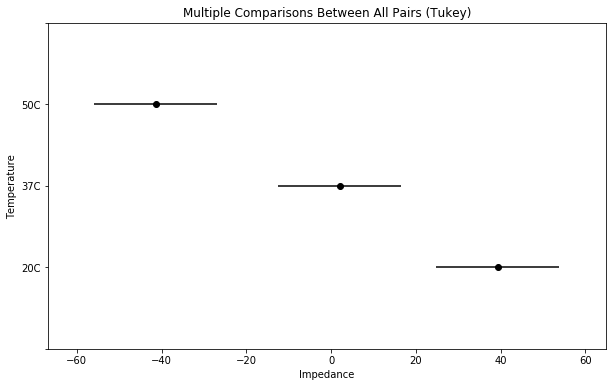

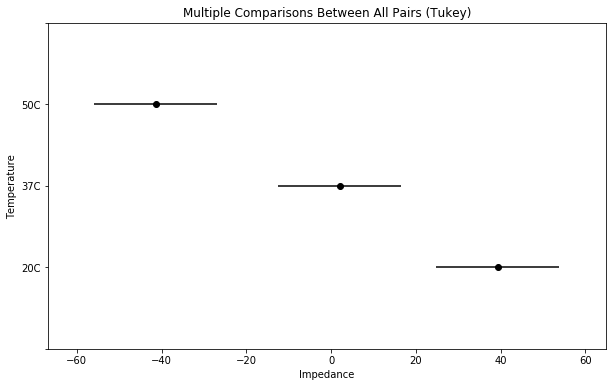

In [6]:
tukey_res.plot_simultaneous(ylabel= "Temperature", xlabel= "Impedance")

For the effect of the Matrix:

In [7]:
from statsmodels.stats.multicomp import MultiComparison

#The multiple comparison testing is done between data without the average contribution from the phantom
mc = MultiComparison(df['Impedance'] - df.groupby(dta2['Temperature'])['Impedance'].transform('mean'), df['Matrix'])
# df.groupby(dta2['Phantom'])['Density'].transform('mean') is averaging the grouped data for each phantom 
# so we test density once we remove this average phantom contribution 
tukey_res = mc.tukeyhsd()
summary = tukey_res.summary()
print(summary)

#The p-values associated with those hypothesis
from statsmodels.stats.libqsturng import psturng
p_values = psturng(np.abs(tukey_res.meandiffs / tukey_res.std_pairs), len(tukey_res.groupsunique), tukey_res.df_total)
print("p values:", p_values)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1      group2   meandiff  lower    upper  reject
--------------------------------------------------------
b'Matrix 1' b'Matrix 2' 25.1667   -3.927  54.2603 False 
b'Matrix 1' b'Matrix 3' 41.9167   12.823  71.0103  True 
b'Matrix 2' b'Matrix 3'  16.75   -12.3436 45.8436 False 
--------------------------------------------------------
p values: [0.10073597 0.00343735 0.34692102]


Matrix 1 and 3 are different but there seems to be no differences between the other ones. Graphically we can see however there is a trend and impedance is increased between those three matrices. Because these are not continuous variables is not information we could use.

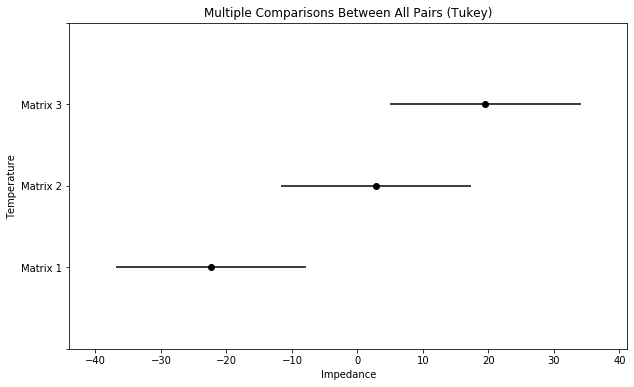

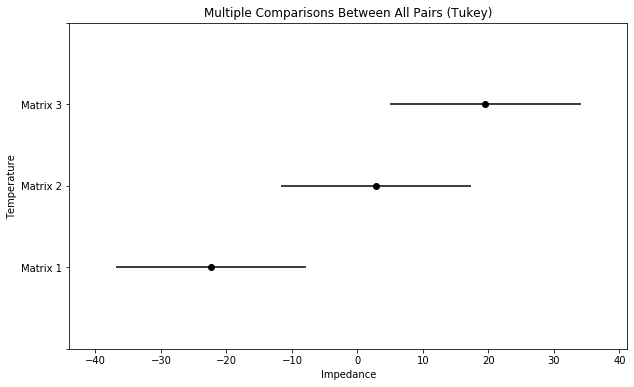

In [8]:
tukey_res.plot_simultaneous(ylabel= "Temperature", xlabel= "Impedance")

For the interaction we need to do some data merging so we can analyse it. We will combine the data so their name is given by the combination we used, and then run the Tukey HSD:

In [9]:
from statsmodels.stats.multicomp import MultiComparison


#We combine the names
interaction_groups = "Temp_" + df.Temperature.astype(str) + " & " + "Matrix_" + df.Matrix.astype(str)

mc = MultiComparison(df['Impedance'] , interaction_groups)
tukey_res = mc.tukeyhsd()
summary = tukey_res.summary()
print(summary)

#The p-values associated with those hypothesis
from statsmodels.stats.libqsturng import psturng
p_values = psturng(np.abs(tukey_res.meandiffs / tukey_res.std_pairs), len(tukey_res.groupsunique), tukey_res.df_total)
print("p values:", p_values)

                        Multiple Comparison of Means - Tukey HSD,FWER=0.05                        
             group1                           group2              meandiff  lower    upper  reject
--------------------------------------------------------------------------------------------------
Temp_b'20C' & Matrix_b'Matrix 1' Temp_b'20C' & Matrix_b'Matrix 2'   21.0   -40.822   82.822 False 
Temp_b'20C' & Matrix_b'Matrix 1' Temp_b'20C' & Matrix_b'Matrix 3'   9.25   -52.572   71.072 False 
Temp_b'20C' & Matrix_b'Matrix 1' Temp_b'37C' & Matrix_b'Matrix 1'  -77.5   -139.322 -15.678  True 
Temp_b'20C' & Matrix_b'Matrix 1' Temp_b'37C' & Matrix_b'Matrix 2'  -15.0   -76.822   46.822 False 
Temp_b'20C' & Matrix_b'Matrix 1' Temp_b'37C' & Matrix_b'Matrix 3'   11.0   -50.822   72.822 False 
Temp_b'20C' & Matrix_b'Matrix 1' Temp_b'50C' & Matrix_b'Matrix 1'  -77.25  -139.072 -15.428  True 
Temp_b'20C' & Matrix_b'Matrix 1' Temp_b'50C' & Matrix_b'Matrix 2'  -85.25  -147.072 -23.428  True 
Temp_b'20C

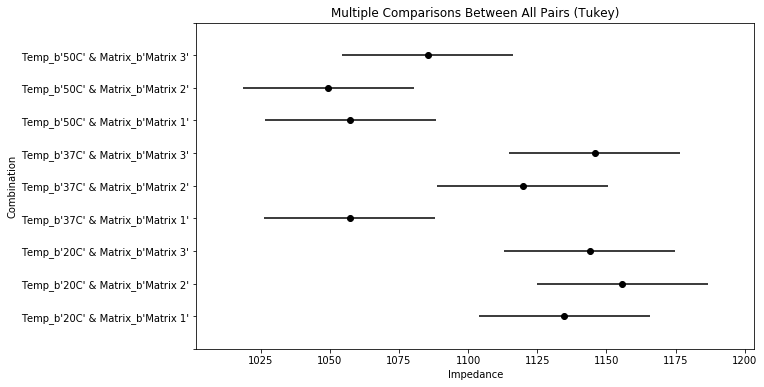

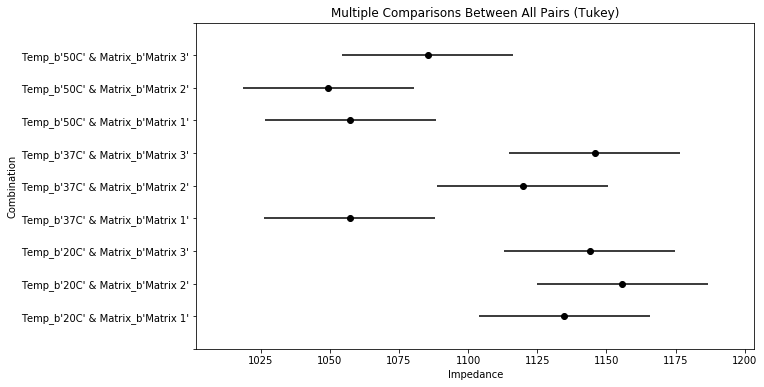

In [10]:
tukey_res.plot_simultaneous(ylabel= "Combination", xlabel= "Impedance")

Analysing the interaction is a little more complex but we can still observe:
1. As long as we stay at room temperature the choice of matrix does not seem to modify the impedance
2. At 37C that we have a decrease in impedance for matrix 1
3. At high temperature the matrix choice will not affect the impedance but overall we will have a lower impedance
4. It seems that if we want to have a reproducible impedance we should choose to work at room temperature OR at high temperature, and the matrix will not affect our resulting impedance
5. We could control the impedance using the temperature: for higher impedance use room temperature, for lower impedance use $50^oC$ and the matrix will not affect us
6. If we want to control the impedance we could also decide to chose matrix 1 or matrix 2 and either work at room temperature or anywhere between 37C and 50C to reduce final impedance. But matrix 3 **will not** allow us to do this

## Activity: write down other possible conclusions while analysing the data

## Statistical Power

As for other ANOVA tests we can do power calculations. There are no readily available tools to calculate the power of a factorial design  to answer:

1. How sure am I that if I was correct in **not** rejecting the null hypothesis? **Type II error**
2. How many samples would I have needed if I wanted to detect a specific difference

We can use the ROC graphs ensuring we use the right degrees of freedom, or we can use the functions in Python.

Note that the degrees of freedom are in the ANOVA table, the numerator is related to the factor of interest, the denominator to the *Residual*. Also note that if you erroneously used a 1-way ANOVA or combined the data, those degrees of freedom will be erroneous as well !

For power calculations we will need to calculate the **effect size**, which is defined by the $\eta^2$. We will calculate this value here for the whole table. 

Note that for each factor this is obtained from:

$$\eta^2=\frac{SS_{factor}}{SS_{factor}+SS_{error}}$$

Remember the $SS_{error}$ is the *Residual*

We will calculate $\eta^2$ for each of the factors.

In [11]:
# We first extract SS_error from the ANOVA table
SS_error = anovaResults[-1:]['sum_sq'][0]   # the last row is -1 and it is the Residuals

# Then calculate eta_sqare with the formula for all factors (0:one less of the total rows as those are Resiguals)
eta_sq = anovaResults[0:len(anovaResults)-1]['sum_sq']/(anovaResults[0:len(anovaResults)-1]['sum_sq']+SS_error)

# This code will add a column to the ANOVA results with the EtaSquare 
anovaResults['eta_sq'] = eta_sq

print(anovaResults)

                      df        sum_sq       mean_sq          F        PR(>F)  \
Matrix               2.0  10683.722222   5341.861111   7.911372  1.976083e-03   
Temperature          2.0  39118.722222  19559.361111  28.967692  1.908596e-07   
Matrix:Temperature   4.0   9613.777778   2403.444444   3.559535  1.861117e-02   
Residual            27.0  18230.750000    675.212963        NaN           NaN   

                      eta_sq  
Matrix              0.369494  
Temperature         0.682111  
Matrix:Temperature  0.345266  
Residual                 NaN  


With the effect size $\eta^2$ can be then used to perform a ANOVA Power test. 

Note that for now, Python **does not** have a power calculation function that accounts for more than one effect so we will use again **R. R** is a great tool for statistics although it requires often quite a bit of training to use as they use often statistic terms. But if you have the name of the function to run you can invoke it from Python.

For factorial design R does not have a specific power calculation but a sample calculation can also give us a good answer. If we have enough samples to achieve a power of 80% we are in a good position.

In [12]:
# We first export a package rpy2 that allows to run R within Python
%load_ext rpy2.ipython
# and the robject that will let me invoke R objects
import rpy2.robjects as robjects

#finally, I prepare myself the string that will be passed to run to R
#note that I will manually enter here for simplicity the values 
rstring="""
library(easypower)
main.eff.1 <- list(name = "Matrix", levels = 3, eta.sq = 0.369494)
main.eff.2 <- list(name = "Temperature", levels = 3, eta.sq = 0.682111)
n.multiway(iv1=main.eff.1, iv2=main.eff.2, interaction.eta2 = 0.345266, result="highest", sig.level = 0.05, power = 0.866)
""" #quick note for this multiway, the highest parameter is giving us the maximum number of samples required

#and invoke R
rfunc=robjects.r(rstring)
#finally, I print what R obtained as a result
print(rfunc)



Treatment: Matrix*Temperature

Effect Size: 0.345266

Total N: 36

n per cell: 4





R is telling us that to have a power of 80% and a significance of 95% we then need to have 32 samples in total or 4 samples per cell. It also tells that it is the interaction that requires this number of samples, so we can assume that a single effect from matrix or temperature can be detected with less samples. 

This is the number of samples per cell we had, so we can conclude that we have a power of 80% or higher.

## Activity: try higher power levels and see at which point you would require to increase the number of samples per cell

## Fitting Data

One final concept to review in factorial design is the **$R^2$**. This tells us the probability that the model we have determined is indeed explained by the factors and interactions we found to be significant.

$$R^2 = \frac{SS_{factor1} + SS_{factor2} + ... + SS_{factorp} + SS_{interactions}}{SS_{total}}$$

We can obtain from the ANOVA results those values and calculate $R^2$

In [13]:
print(anovaResults)
SS_nominator = np.sum(anovaResults[:-1]['sum_sq'] )
SS_total = np.sum(anovaResults[:]['sum_sq'])  #Note the total includes residual

R_square = SS_nominator/SS_total

print(R_square)

                      df        sum_sq       mean_sq          F        PR(>F)  \
Matrix               2.0  10683.722222   5341.861111   7.911372  1.976083e-03   
Temperature          2.0  39118.722222  19559.361111  28.967692  1.908596e-07   
Matrix:Temperature   4.0   9613.777778   2403.444444   3.559535  1.861117e-02   
Residual            27.0  18230.750000    675.212963        NaN           NaN   

                      eta_sq  
Matrix              0.369494  
Temperature         0.682111  
Matrix:Temperature  0.345266  
Residual                 NaN  
0.7652097760125877


Telling us that there is a 76.52%  probability that the variability in impedance is explained by the matrix choice and the temperature considering interaction between those factors.

Finally, the **statsmodels** package that we have used for ANOVA can also provide us with a fit information for the factorial design. 

We already had fitted the model using *ols*, so we can print a summary of that model and inspect the result.

We will now finalize the fit analysis using this function by printing the model summary.

In [14]:
modelFit = ols('Impedance ~ Matrix + Temperature + Matrix:Temperature',df).fit()

print(modelFit.summary())

                            OLS Regression Results                            
Dep. Variable:              Impedance   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     11.00
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           9.43e-07
Time:                        11:55:17   Log-Likelihood:                -163.17
No. Observations:                  36   AIC:                             344.3
Df Residuals:                      27   BIC:                             358.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

We can observe:

1. $R^2$ value in here as well and indicates a good fit but not extremely so
2. The adjusted $R^2$ being not so close to the $R^2$ indicates that accounting for the number of samples the fit is degraded so we can get a better model if we increase our samples
3. Our $F$ and the associated $p$ indicates that we can be quite confident that our model is linear $p<<0.001$
4. Going feature by feature we see that the ones that are really significant are *temperature* but the *matrix* is not really required for prediction, we also need a factor if we choose *matrix 3* at $37^oC$ but none of the other interactions are significant. **Note that this wil not be equivalent to ANOVA as these are pairwise T-Tests that are used for modeling**. We will then favour the use of those features to predict new responses but not interactions.

We finally can use that table to do predictions for our data by using the intercept and coefficients (those that are statistically significant only).

Note here that the model is working with categorical variables! 

This means the model looks like this for a prediction with Matrix 3 at $37^oC$ the model looks like this:

$$Impedance = Intercept + coef(Temperature[T.37C])+$$
$$coef(Matrix[T.Matrix 3]:Temperature[T.37C])=1134.75 - 77.50 + 79.25 = 1136.50$$

We don't add any other coefficient that are not significant or not indicated in the table (those are included in the intercept).

## Activity: make a prediction showing the equation for Matrix 1 at $50^oC$

## Three or More Factors

Input factors can be more than two as long as we test all combinations and we have at least 2 repetitions per combination. We will show here a case for three factors. 

## CASE

We are building a device to keep the temperature in a chamber between $34^oC$ and $45^oC$. We have designed it so that we
can switch between two lengths and two gauges of heating wire, and we can control the current. We know that by controlling these factors we can vary the temperature but we are unsure if all factors affect the temperature and if they are inter-dependent.

This includes then 3 factors. We have two values for the length, two values for the gauge and any values we can chose for the current (for this example I will try three values: $1A$, $2A$ and $3A$.

Because we have $2^4 = 16$ combinations. We could try them all, but for an initial experiment we decide to try 5 possibilities and see if any of them is really different to the others

## Model

1. We have **3 input factors with different possible levels** ($15 cm$ and $25 cm$; $32G$ and  $38G$; $1A$, $2A$ and $3A$)
2. We measure as our **output factor** the temperature
3. We have some **controllable factors**: same operator, device, thermometre...
4. We have some **uncontrollable factors**: room temperature when working, humidity of the room...

**How is the temperature influenced by any combination of factors?**

We place ont of the factors to be studied as rows, the other as columns and subcolumns:

..............|   32G cable    |  ...|     38G cable    |  | 
-- |----|----- |---|---| 


Current | 15cm |   20cm   | 15cm  |    20cm    |
-- |---- |---- |---- |---- |
1  | 30 | 36 | 31 | 38 |  
   | 32 | 37 | 32 | 38 | 
2  | 33 | 39 | 34 | 43 |  
   | 34 | 38 | 35 | 42 | 
3  | 40 | 46 | 41 | 49 |  
   | 39 | 45 | 43 | 50 | 




In [15]:
import pandas as pd
import numpy as np

# Put into dataframe
dta2 = np.rec.array([
    (  1,  '1 A', '32G', '15cm', 30), (  2,  '1 A', '32G', '15cm', 32) , (  3, '1 A', '32G', '20cm',36) , (  4,  '1 A', '32G','20cm', 37) , 
    (  5,  '2 A', '32G', '15cm', 33), (  6,  '2 A', '32G', '15cm', 34) , (  7, '2 A', '32G', '20cm',39) , (  8,  '2 A', '32G','20cm', 38) , 
    (  9,  '3 A', '32G', '15cm', 40), ( 10,  '3 A', '32G', '15cm', 39) , ( 11, '3 A', '32G', '20cm',46) , ( 12,  '3 A', '32G','20cm', 45) , 
    ( 13,  '1 A', '38G', '15cm', 31), ( 14,  '1 A', '38G', '15cm', 32) , ( 15, '1 A', '38G', '20cm',38) , ( 16,  '1 A', '38G','20cm', 38) , 
    ( 17,  '2 A', '38G', '15cm', 34), ( 18,  '2 A', '38G', '15cm', 35) , ( 19, '2 A', '38G', '20cm',43) , ( 20,  '2 A', '38G','20cm', 42) , 
    ( 21,  '3 A', '38G', '15cm', 41), ( 22,  '3 A', '38G', '15cm', 43) , ( 23, '3 A', '38G', '20cm',49) , ( 24,  '3 A', '38G','20cm', 50) ] , 
    dtype=[('id', '<i4'), ('Current', '|S17'), ('Gauge', '|S15'), ('Length', '|S15'), ('Temperature', '<f')])
    
df = pd.DataFrame(dta2)
print(df)

    id Current   Gauge   Length  Temperature
0    1  b'1 A'  b'32G'  b'15cm'         30.0
1    2  b'1 A'  b'32G'  b'15cm'         32.0
2    3  b'1 A'  b'32G'  b'20cm'         36.0
3    4  b'1 A'  b'32G'  b'20cm'         37.0
4    5  b'2 A'  b'32G'  b'15cm'         33.0
5    6  b'2 A'  b'32G'  b'15cm'         34.0
6    7  b'2 A'  b'32G'  b'20cm'         39.0
7    8  b'2 A'  b'32G'  b'20cm'         38.0
8    9  b'3 A'  b'32G'  b'15cm'         40.0
9   10  b'3 A'  b'32G'  b'15cm'         39.0
10  11  b'3 A'  b'32G'  b'20cm'         46.0
11  12  b'3 A'  b'32G'  b'20cm'         45.0
12  13  b'1 A'  b'38G'  b'15cm'         31.0
13  14  b'1 A'  b'38G'  b'15cm'         32.0
14  15  b'1 A'  b'38G'  b'20cm'         38.0
15  16  b'1 A'  b'38G'  b'20cm'         38.0
16  17  b'2 A'  b'38G'  b'15cm'         34.0
17  18  b'2 A'  b'38G'  b'15cm'         35.0
18  19  b'2 A'  b'38G'  b'20cm'         43.0
19  20  b'2 A'  b'38G'  b'20cm'         42.0
20  21  b'3 A'  b'38G'  b'15cm'         41.0
21  22  b'

We can use again the N-way ANOVA considering the right model.

We will construct the **model** used accounts for **all** factors **as well as the interactions** (in our case the current, gauge and length). So when we construct as we already did before our model using **ols** we will need to use a *Current + Gauge + Length + (Current)(Gauge) + (Current)(Length) + (Gauge)(Length) + (Current)(Gauge)(Length)* model.

And then running the ANOVA test and print the results:

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Temperature ~ Current + Gauge + Length + Current:Gauge + Current:Length + Length:Gauge + Current:Gauge:Length ',df).fit()
#this ensures it is a N-way ANOVA 
    
anovaResults =  anova_lm(model, typ=2)

print(anovaResults)

                          sum_sq    df           F        PR(>F)
Current               410.083333   2.0  289.470588  7.011678e-11
Gauge                  30.375000   1.0   42.882353  2.735540e-05
Length                247.041667   1.0  348.764706  3.099839e-10
Current:Gauge           5.250000   2.0    3.705882  5.580812e-02
Current:Length          0.583333   2.0    0.411765  6.714939e-01
Length:Gauge            5.041667   1.0    7.117647  2.049043e-02
Current:Gauge:Length    1.083333   2.0    0.764706  4.868711e-01
Residual                8.500000  12.0         NaN           NaN


From these results we can conclude that all individual factors have an effect on the temperature, and there is one significant interaction:
* Length and Gauge

But all other interactions are not.

Using Tukey HSD test we can determine trends for each of the factors and the combinations.

First for the **Current**:

In [17]:
from statsmodels.stats.multicomp import MultiComparison

#The multiple comparison testing is done between data without the average contribution from the other factors
mc = MultiComparison(df['Temperature'] 
                     - df.groupby(dta2['Gauge'])['Temperature'].transform('mean')
                     - df.groupby(dta2['Length'])['Temperature'].transform('mean'), df['Current'])

tukey_res = mc.tukeyhsd()
summary = tukey_res.summary()
print(summary)

#The p-values associated with those hypothesis
from statsmodels.stats.libqsturng import psturng
p_values = psturng(np.abs(tukey_res.meandiffs / tukey_res.std_pairs), len(tukey_res.groupsunique), tukey_res.df_total)
print("p values:", p_values)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower   upper  reject
--------------------------------------------
b'1 A' b'2 A'   3.0    1.7564  4.2436  True 
b'1 A' b'3 A'  9.875   8.6314 11.1186  True 
b'2 A' b'3 A'  6.875   5.6314  8.1186  True 
--------------------------------------------
p values: [0.001 0.001 0.001]


Telling us as expected that all values have a significant difference (p<<0.001). Graphically we can easily see that the higher the current the higher the temperature:

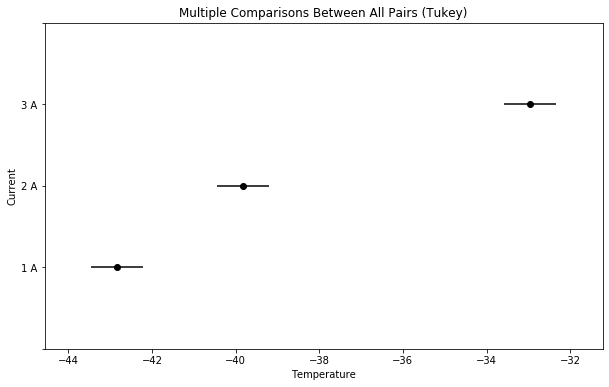

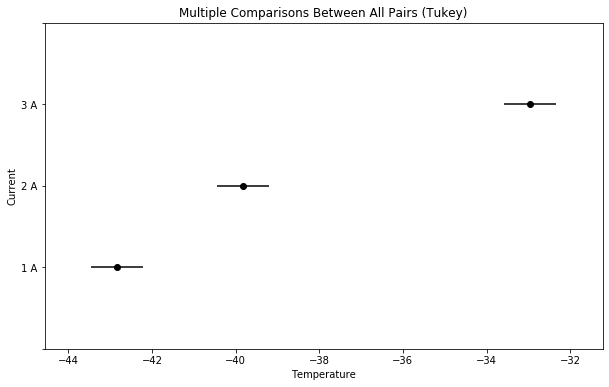

In [32]:
tukey_res.plot_simultaneous(ylabel= "Current", xlabel= "Temperature")

For the **Gauge**:

In [18]:
from statsmodels.stats.multicomp import MultiComparison

#The multiple comparison testing is done between data without the average contribution from the other factors
mc = MultiComparison(df['Temperature'] 
                     - df.groupby(dta2['Current'])['Temperature'].transform('mean')
                     - df.groupby(dta2['Length'])['Temperature'].transform('mean'), df['Gauge'])

tukey_res = mc.tukeyhsd()
summary = tukey_res.summary()
print(summary)

#The p-values associated with those hypothesis
from statsmodels.stats.libqsturng import psturng
p_values = psturng(np.abs(tukey_res.meandiffs / tukey_res.std_pairs), len(tukey_res.groupsunique), tukey_res.df_total)
print("p values:", p_values)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
b'32G' b'38G'   2.25   1.4335 3.0665  True 
-------------------------------------------
p values: 0.001


Different gauge does give different temperatures. Graphically the **plot_simultaneous** function fails when there is less than two rows as in our case. 

I have implemented the function here (using errorbar).

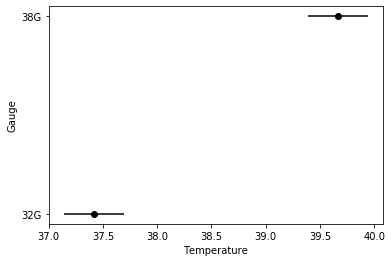

In [34]:
import matplotlib.pyplot as plt

grouped = df.groupby(dta2['Gauge'])
A32G=grouped.get_group('32G'.encode('UTF-8'))['Temperature']
A38G=grouped.get_group('38G'.encode('UTF-8'))['Temperature']

plt.errorbar([np.mean(A32G), np.mean(A38G)], ['32G', '38G'], xerr=[tukey_res.std_pairs[0], tukey_res.std_pairs[0]], marker='o', linestyle='None', color='k', ecolor='k')
plt.ylabel('Gauge')
plt.xlabel('Temperature')
plt.show()

Finally the effect of the Length:

In [19]:
from statsmodels.stats.multicomp import MultiComparison

#The multiple comparison testing is done between data without the average contribution from the other factors
mc = MultiComparison(df['Temperature'] 
                     - df.groupby(dta2['Current'])['Temperature'].transform('mean')
                     - df.groupby(dta2['Gauge'])['Temperature'].transform('mean'), df['Length'])

tukey_res = mc.tukeyhsd()
summary = tukey_res.summary()
print(summary)

#The p-values associated with those hypothesis
from statsmodels.stats.libqsturng import psturng
p_values = psturng(np.abs(tukey_res.meandiffs / tukey_res.std_pairs), len(tukey_res.groupsunique), tukey_res.df_total)
print("p values:", p_values)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff lower  upper  reject
---------------------------------------------
b'15cm' b'20cm'  6.4167  5.6002 7.2331  True 
---------------------------------------------
p values: 0.001


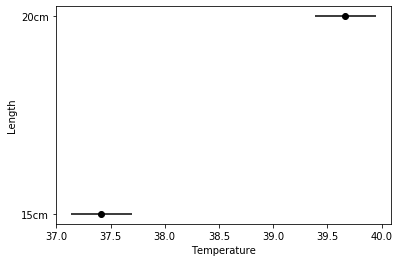

In [36]:
import matplotlib.pyplot as plt

grouped = df.groupby(dta2['Length'])
A15=grouped.get_group('15cm'.encode('UTF-8'))['Temperature']
A20=grouped.get_group('20cm'.encode('UTF-8'))['Temperature']

plt.errorbar([np.mean(A32G), np.mean(A38G)], ['15cm', '20cm'], xerr=[tukey_res.std_pairs[0], tukey_res.std_pairs[0]], marker='o', linestyle='None', color='k', ecolor='k')
plt.ylabel('Length')
plt.xlabel('Temperature')
plt.show()

## Statistical Power

As for other ANOVA tests we can do power calculations. There are no readily available tools to calculate the power of a factorial design  to answer:

1. How sure am I that if I was correct in **not** rejecting the null hypothesis? **Type II error**
2. How many samples would I have needed if I wanted to detect a specific difference

We can use the ROC graphs ensuring we use the right degrees of freedom, or we can use the functions in Python.

Note that the degrees of freedom are in the ANOVA table, the numerator is related to the factor of interest, the denominator to the *Residual*. Also note that if you erroneously used a 1-way ANOVA or combined the data, those degrees of freedom will be erroneous as well !

For power calculations we will need to calculate the **effect size**, which is defined by the $\eta^2$. We will calculate this value here for the whole table. 

Note that for each factor this is obtained from:

$$\eta^2=\frac{SS_{factor}}{SS_{factor}+SS_{error}}$$

Remember the $SS_{error}$ is the *Residual*

We will calculate $\eta^2$ for each of the factors.

In [20]:
# We first extract SS_error from the ANOVA table
SS_error = anovaResults[-1:]['sum_sq'][0]   # the last row is -1 and it is the Residuals

# Then calculate eta_sqare with the formula for all factors (0:one less of the total rows as those are Resiguals)
eta_sq = anovaResults[0:len(anovaResults)-1]['sum_sq']/(anovaResults[0:len(anovaResults)-1]['sum_sq']+SS_error)

# This code will add a column to the ANOVA results with the EtaSquare 
anovaResults['eta_sq'] = eta_sq

print(anovaResults)


                          sum_sq    df           F        PR(>F)    eta_sq
Current               410.083333   2.0  289.470588  7.011678e-11  0.979693
Gauge                  30.375000   1.0   42.882353  2.735540e-05  0.781350
Length                247.041667   1.0  348.764706  3.099839e-10  0.966737
Current:Gauge           5.250000   2.0    3.705882  5.580812e-02  0.381818
Current:Length          0.583333   2.0    0.411765  6.714939e-01  0.064220
Length:Gauge            5.041667   1.0    7.117647  2.049043e-02  0.372308
Current:Gauge:Length    1.083333   2.0    0.764706  4.868711e-01  0.113043
Residual                8.500000  12.0         NaN           NaN       NaN


With the effect size $\eta^2$ can be then used to perform a ANOVA Power test. 

Note that for now, Python **does not** have a power calculation function that accounts for more than one effect so we will use again **R. R** is a great tool for statistics although it requires often quite a bit of training to use as they use often statistic terms. But if you have the name of the function to run you can invoke it from Python.

For factorial design R does not have a specific power calculation but a sample calculation can also give us a good answer. If we have enough samples to achieve a power of 80% we are in a good position. In this case we **do not** have this power for interactions, but we do have it for individual effects:

In [30]:
# We first export a package rpy2 that allows to run R within Python
%load_ext rpy2.ipython
# and the robject that will let me invoke R objects
import rpy2.robjects as robjects

#finally, I prepare myself the string that will be passed to run to R
#note that I will manually enter here for simplicity the values 
rstring="""
library(easypower)
main.eff.1 <- list(name = "Current", levels = 3, eta.sq = 0.979693)
main.eff.2 <- list(name = "Gauge", levels = 2, eta.sq = 0.781350)
main.eff.3 <- list(name = "Length", levels = 2, eta.sq = 0.966737)
n.multiway(iv1=main.eff.1, iv2=main.eff.2, iv3=main.eff.3, interaction.eta2 = 0.381818, result="highest", sig.level = 0.05, power = 0.8)
""" #quick note for this multiway, the highest parameter is giving us the maximum number of samples required

#and invoke R
rfunc=robjects.r(rstring)
#finally, I print what R obtained as a result
print(rfunc)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Treatment: Current*Gauge

Effect Size: 0.381818

Total N: 28

n per cell: 3





R is telling us that to have a power of 80% and a significance of 95% we then need to have 3 samples per cell if we want to detect interactions at that power, but if you only need the main effect the power is 80%. 


## Activity: determine what is the number of samples per cell you need to be sure you can detect all interactions

## Fitting Data

One final concept to review in factorial design is the **$R^2$**. This tells us the probability that the model we have determined is indeed explained by the factors and interactions we found to be significant.

$$R^2 = \frac{SS_{factor1} + SS_{factor2} + ... + SS_{factorp} + SS_{interactions}}{SS_{total}}$$

We can obtain from the ANOVA results those values and calculate $R^2$

In [31]:
SS_nominator = np.sum(anovaResults[:-1]['sum_sq'] )
SS_total = np.sum(anovaResults[:]['sum_sq'])  #Note the total includes residual

R_square = SS_nominator/SS_total

print(R_square)

0.9879936436937203


Telling us that there is a 98.8%  probability that the variability in temperature is explained by the current, gauge and length considering interaction between those factors.

Finally, the **statsmodels** package that we have used for ANOVA can also provide us with a fit information for the factorial design. 

We already had fitted the model using *ols*, so we can print a summary of that model and inspect the result.

But at that time we had discovered that some of the combinations were **not** significant (actually, only length:gauge was significant as a combination). We will need to then eliminate from the model those features we know are not significant.

We will then finalize the fit analysis.

In [32]:
modelFit = ols('Temperature ~ Current + Gauge + Length + Current:Gauge + Current:Length + Gauge:Length + Current:Gauge:Length',df).fit()
#this ensures it is a N-way ANOVA 

print(modelFit.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     89.77
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           9.03e-10
Time:                        12:05:53   Log-Likelihood:                -21.599
No. Observations:                  24   AIC:                             67.20
Df Residuals:                      12   BIC:                             81.33
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

We can observe:

1. $R^2$ value in here as well and indicates a very good fit
2. The adjusted $R^2$ being close to the $R^2$ indicates that accounting for the number of samples this is still a good fit
3. Our $F$ and the associated $p$ indicates that we can be quite confident that our model is linear $p<<0.001$
4. Going feature by feature we see that the ones that are really significant are *current*, *gauge* and *length* but none of the interactions are. **Note that this wil not be equivalent to ANOVA as these are pairwise T-Tests that are used for modeling**. We will then favour the use of those features to predict new responses but not interactions.

To make predictions we can use the table coefficients.

Remember that the model is working with categorical variables. This means the model looks like this for a prediction with $2 A$, $32G$ and $20 cm$:

$$Temperature = Intercept + coef(Current[T.2 A]) + coef(Length[T.20cm] =$$
$$31 + 2.5 + 5.5 = 39^oC$$

We don't add any other coefficient that indicate they are not significant, and we don't add the coefficient for $32G$ as that is not listed because it was considered in the intercept.

## Activity: make a prediction showing the equation for 1A, 38G and 20cm

## Summary

In this example:

1. We introduced the factorial design method to determine two or more factors and their interactions
2. We discused the use of multiple samples per combination to study interactions between factors
3. We applied a N-way ANOVA to analyse the results from factorial design
4. We analysed the results from an ANOVA table to evaluate which factors or combinations are significantly affecting our output variable
5. We evaluated the minimum sample size to achieve power in a factorial design
6. We introduced the use of linear models to predict our data

References
---------------

* Montgomery, Douglas C. "Design and analysis of experiments. John Wiley & Sons." Inc., New York 1997 (2001).